In [ ]:
# using csv file as input


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn

%matplotlib inline

In [3]:
# Read the input file and view few records
mall = pd.read_csv('mall_customer.csv')
mall.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [13]:
from sklearn.cluster import KMeans

In [14]:
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
X=mall[['Age','Annual Income (k$)','Spending Score (1-100)']]
X.head(5)

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [35]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
mall_s=scalar.fit_transform(X)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(mall_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[-0.76072691  0.05496398  0.83369302  1.12815215]
 [ 0.6644943  -0.06648421 -0.59855788 -0.88640526]
 [-0.74719196 -0.03409802  0.67876434 -0.88640526]
 [ 0.75982983  0.07086791 -0.81492926  1.12815215]]
[0 0 1 2 2 2 1 2 3 2 3 2 1 2 3 0 1 0 3 2 3 0 1 0 1 0 1 0 1 2 3 2 3 0 1 2 1
 2 1 2 1 0 3 2 1 2 1 2 2 2 1 0 2 3 1 3 1 3 2 3 3 0 1 1 3 0 1 1 0 2 3 1 1 1
 3 0 1 3 2 1 3 0 3 1 2 3 1 2 2 1 1 0 3 1 2 0 1 2 3 0 2 1 3 0 3 2 1 3 3 3 3
 2 1 0 2 2 1 1 1 1 0 1 2 0 2 2 3 0 3 0 3 0 2 2 3 2 1 0 3 2 1 0 2 2 3 0 3 2
 1 0 3 0 1 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 1 0 3 0 3 0 1 2 3 0 3 0 1 2 3 2 1
 0 1 0 1 2 1 2 3 2 1 2 1 0 3 0]


In [45]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(mall_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 0.44680201 -0.10812358 -0.5442077  -0.88640526]
 [-0.77529133  0.04688104  0.88056434  0.03792108]
 [ 0.74307816  0.06431159 -0.79449512  1.12815215]]
[1 1 0 1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1 0 1 0 1 0 1 2 1 2 1 0 1 0
 1 0 1 0 1 2 1 0 1 0 0 0 0 0 1 0 2 0 2 0 2 1 2 2 1 0 0 2 1 0 0 1 0 2 0 0 0
 2 1 0 2 1 0 2 2 2 0 1 2 0 1 1 0 0 1 2 0 0 1 0 1 2 1 1 0 2 1 2 1 0 2 2 2 2
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 2 1 2 1 2 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1 2 1
 0 1 2 1 0 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 0 1 2 1 0
 1 0 1 0 1 0 1 2 1 0 1 0 1 2 1]


In [46]:
## Elbow test
cluster_range = range(1,20)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(mall_s)
    cluster_errors.append(clusters.inertia_)

In [47]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

num_clusters  cluster_errors
0             1      800.000000
1             2      588.802677
2             3      476.787554
3             4      386.714786
4             5      325.682790
5             6      275.858843
6             7      236.431607
7             8      205.941631
8             9      174.188000
9            10      152.118013

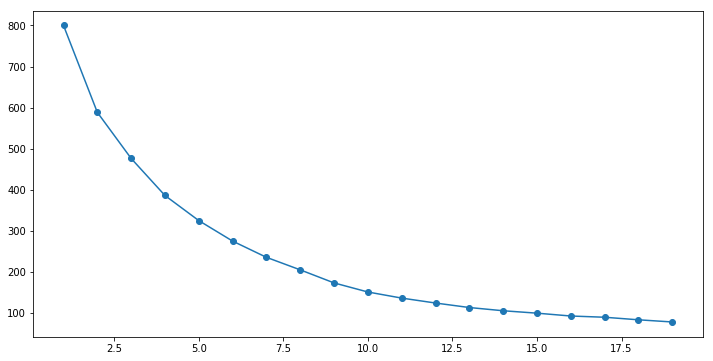

In [48]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [30]:
kmeans=KMeans(n_clusters=5,random_state=0).fit(mall_s) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 0.07333084  0.97494509 -1.19729675]
 [ 1.20484056 -0.23577338 -0.05236781]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [-0.42880597  0.97484722  1.21608539]]
[2 2 3 2 2 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 3 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 0 2 2 2 1 1 1 1 2 0 4 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 1 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4]


In [31]:
## After labelEncoding Gender

In [32]:
#Import labelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting string labels into numbers.
Gender=le.fit_transform(mall['Genre'])
print(Gender)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [34]:
X['Gender']=Gender
X.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   19                  15                      39       1
1   21                  15                      81       1
2   20                  16                       6       0
3   23                  16                      77       0
4   31                  17                      40       0